In [1]:
import networkx as nx

In [2]:
DG=nx.DiGraph()

In [3]:
DG

In [4]:
%matplotlib inline

In [5]:
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

In [6]:
DG.out_degree(1,weight='weight')

0.5

In [7]:
DG.successors(1)

[2]

In [8]:
import matplotlib.pyplot as plt

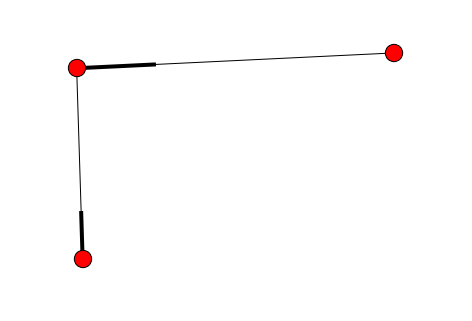

In [12]:
nx.draw(DG)

In [13]:
DG.nodes()

[1, 2, 3]

In [21]:
nx.shortest_simple_paths(DG, 3, 2)

<generator object shortest_simple_paths at 0x05D69350>

In [23]:
paths = list(nx.shortest_simple_paths(DG, 3, 2))

In [24]:
print(paths)

[[3, 1, 2]]


In [25]:
DG.add_weighted_edges_from([(3,2,4)])

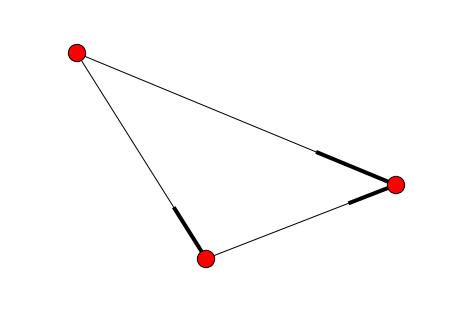

In [30]:
nx.draw(DG)

In [28]:
paths_add = list(nx.shortest_simple_paths(DG, 3, 2))
print(paths_add)

[[3, 2], [3, 1, 2]]


In [29]:
paths_add = list(nx.shortest_simple_paths(DG, 3, 2, weight='weight'))
print(paths_add)

[[3, 1, 2], [3, 2]]


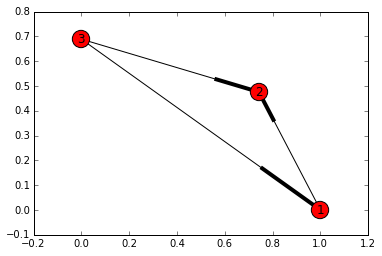

In [31]:
nx.draw_networkx(DG)

{(1, 2): <matplotlib.text.Text at 0x5db8ab0>,
 (3, 1): <matplotlib.text.Text at 0x6ea2590>,
 (3, 2): <matplotlib.text.Text at 0x6de1150>}

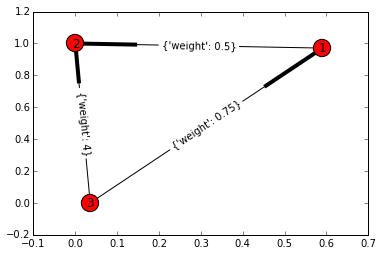

In [46]:
layout=nx.spring_layout(DG)
nx.draw_networkx(DG,pos=layout)
nx.draw_networkx_edge_labels(DG,pos=layout)

[0, 1, 2, 3]
[(0, 1), (0, 2), (0, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
0 1
[2, 3]


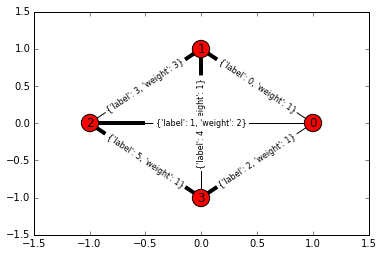

In [55]:
g = open('../test/g.csv')
stv1 = open('../test/stv1.csv')

def read_csv(g, stv1):
    """Read the two csv input files.

    input: two csv input file
        detail of input format in http://codecraft.huawei.com/home/detail
    output: NetworkX-graph
    """
    
    import re
    num = re.compile('\d+')
    
    DG = nx.DiGraph()
    for line in g:
        nums = re.findall(num, line)

        for i in range(4):
            nums[i] = int(nums[i])  # re str to int
        DG.add_edges_from([(nums[1], nums[2])], weight=nums[3], label=nums[0])
        

    
    for line in stv1:
        # s, t, v1(may be blank)
        stv1_list = re.findall(num, line)
        for i in range(len(stv1_list)):
            stv1_list[i] = int(stv1_list[i])
        s = stv1_list[0]
        t = stv1_list[1]
        v1 = stv1_list[2:]
    
    return DG, s, t, v1


DG, s, t, v1 = read_csv(g,stv1)

def check_input(DG, s, t, v1):
    print(DG.nodes())
    print(DG.edges())

    layout=nx.circular_layout(DG)
    nx.draw_networkx(DG,pos=layout)
    nx.draw_networkx_edge_labels(DG, pos=layout, label_pos=0.5, font_size=8)
    
    print(s, t)
    print(v1)

check_input(DG, s, t, v1)